## Pre-Processing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
# read the wine data CSV file
wineDF = pd.read_csv("winequality-red.csv")
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Exploratory Analysis

In [3]:
wineDF["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Training and Testing the Random Forest Model

In [5]:
# split the data into y (quality) X (all other columns)
y = wineDF["quality"]
X = wineDF.drop(columns="quality")

In [6]:
y[:5]

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [7]:
X[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# make the standardScaler object
scaler = StandardScaler()

In [10]:
# fit the data onto the training data
xScaler = scaler.fit(x_train)

In [11]:
# scale the data using .transform function
x_train_scaled = xScaler.transform(x_train)
x_test_scaled = xScaler.transform(x_test)

In [12]:
# import the modules for the accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# attempt to improve the prerformance using an ensemble classifier (Random Forest)
# import the random forest classifier module
from sklearn.ensemble import RandomForestClassifier

In [25]:
# import the random forest classifier module
from sklearn.ensemble import RandomForestClassifier

# Ignore the warning related to feature names
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create a modified version of the RandomForestClassifier class
class ModifiedRandomForest(RandomForestClassifier):
    def fit(self, X, y):
        return super().fit(X, y)

# make the random forest classifier model - use 500 estimators
rfModel = ModifiedRandomForest(n_estimators=500, random_state=42)

In [26]:
# fit the model on the scaled trained data
rfModel = rfModel.fit(x_train_scaled, y_train)

In [27]:
# make a list of predicted values using the scaled testing data
rfPredictedValues = rfModel.predict(x_test_scaled)
rfPredictedValues[:3]

array([6, 6, 5], dtype=int64)

In [28]:
# check the accuracy score
rfAccuracyScore = accuracy_score(y_test, rfPredictedValues)
print(f"Random Forest Accuracy Score: {rfAccuracyScore * 100:.2f}%")

Random Forest Accuracy Score: 67.50%


In [29]:
# check the classification report
print(classification_report(y_test, rfPredictedValues))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.75      0.72       136
           6       0.64      0.72      0.68       128
           7       0.78      0.53      0.63        40
           8       0.50      0.33      0.40         3

    accuracy                           0.68       320
   macro avg       0.44      0.39      0.40       320
weighted avg       0.65      0.68      0.66       320



## Random Forest Machine Learning Model  - Accuracy Score: 67.50%

## Resampling to improve class imbalance

In [30]:
from imblearn.over_sampling import RandomOverSampler

# Perform oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train_scaled, y_train)

# Train the RandomForestClassifier on the resampled data
rfModelResample = RandomForestClassifier(n_estimators=500, random_state=42)
rfModelResample.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
rfPredictedValues = rfModelResample.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, rfPredictedValues)
classificationReport = classification_report(y_test, rfPredictedValues)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classificationReport)

Accuracy: 0.665625
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.75      0.76      0.75       136
           6       0.63      0.69      0.66       128
           7       0.58      0.53      0.55        40
           8       0.33      0.33      0.33         3

    accuracy                           0.67       320
   macro avg       0.38      0.38      0.38       320
weighted avg       0.64      0.67      0.65       320



## Resampling  - Accuracy Score: 66.56%

## Hyperparameter tuning using GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
##from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 600],      # Number of trees in the forest
    'max_depth': [None, 5],          # Maximum depth of each tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'ccp_alpha': [0.0, 0.2],         # Complexity parameter used for Minimal Cost-Complexity Pruning (ccp)
    'max_samples': [None, 0.5],      # Number of samples to draw from X to train each base estimator
    'warm_start': [True, False]      # Whether to reuse the previous solution to initialize the next fit
}

# Create the Random Forest model
rfModelTuning = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rfModelTuning, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'max_samples': None, 'min_samples_split': 2, 'n_estimators': 100, 'warm_start': True}
Best Score: 0.6003859717868338


## Hyperparameter tuning - Accuracy Score: 60.03%

## Extract the feature importances

In [32]:
# extract the feature importances from the random forest classifier
importantFeatures = rfModel.feature_importances_

# sort the features by their importance, zip them, then display them
zippedFeatures = sorted(zip(importantFeatures, X.columns), reverse=True)
zippedFeatures

[(0.15013120034318636, 'alcohol'),
 (0.11050550137030789, 'sulphates'),
 (0.10588744184231347, 'total sulfur dioxide'),
 (0.10240114261026227, 'volatile acidity'),
 (0.08961770969687342, 'density'),
 (0.0803094366609652, 'chlorides'),
 (0.07644213772198243, 'pH'),
 (0.07553100907034485, 'fixed acidity'),
 (0.07269342722714263, 'residual sugar'),
 (0.0708693560248985, 'citric acid'),
 (0.06561163743172306, 'free sulfur dioxide')]

In [33]:
# to visualize the features by their importance
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF

,0,1
0,0.150131,alcohol
1,0.110506,sulphates
2,0.105887,total sulfur dioxide
3,0.102401,volatile acidity
4,0.089618,density
5,0.080309,chlorides
6,0.076442,pH
7,0.075531,fixed acidity
8,0.072693,residual sugar
9,0.070869,citric acid


In [34]:
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF

,0,1
1,,
alcohol,0.150131,alcohol
sulphates,0.110506,sulphates
total sulfur dioxide,0.105887,total sulfur dioxide
volatile acidity,0.102401,volatile acidity
density,0.089618,density
chlorides,0.080309,chlorides
pH,0.076442,pH
fixed acidity,0.075531,fixed acidity
residual sugar,0.072693,residual sugar


In [35]:
# drop the extra 1 column
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF

,0
1,
alcohol,0.150131
sulphates,0.110506
total sulfur dioxide,0.105887
volatile acidity,0.102401
density,0.089618
chlorides,0.080309
pH,0.076442
fixed acidity,0.075531
residual sugar,0.072693


In [36]:
# rename the 0 column
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
importantFeaturesDF

,Feature Importances
1,
alcohol,0.150131
sulphates,0.110506
total sulfur dioxide,0.105887
volatile acidity,0.102401
density,0.089618
chlorides,0.080309
pH,0.076442
fixed acidity,0.075531
residual sugar,0.072693


In [37]:
# to prepare for a horizontal bar chart, sort the values of the feature importance column
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")
importantFeaturesDFSorted

,Feature Importances
1,
free sulfur dioxide,0.065612
citric acid,0.070869
residual sugar,0.072693
fixed acidity,0.075531
pH,0.076442
chlorides,0.080309
density,0.089618
volatile acidity,0.102401
total sulfur dioxide,0.105887


<AxesSubplot:title={'center':'Feature Importances for wine review'}, ylabel='1'>

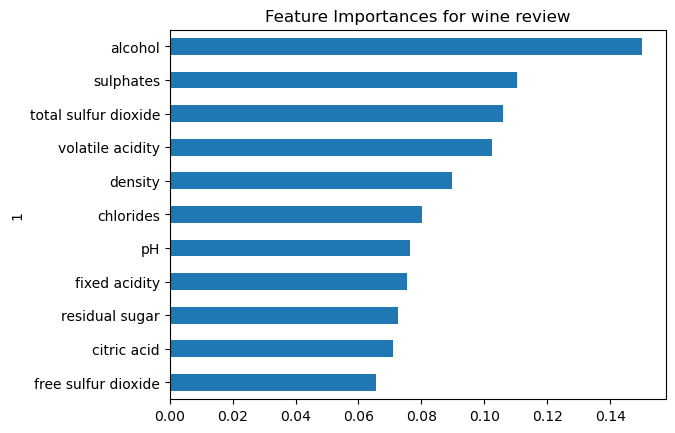

In [38]:
# horizontal bar chart
importantFeaturesDFSorted.plot(
    kind='barh',
    title='Feature Importances for wine review',
    legend=False
    )

## Interactivity: user prompt to get input and predict the wine quality

In [39]:
def predict_wine_quality():
    # Prompt the user for input
    alcohol = float(input("Enter alcohol content: "))
    sulphates = float(input("Enter sulphates content: "))
    total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))
    volatile_acidity = float(input("Enter volatile acidity: "))
    density = float(input("Enter density: "))
    chlorides = float(input("Enter chlorides: "))
    pH = float(input("Enter pH: "))
    fixed_acidity = float(input("Enter fixed acidity: "))
    residual_sugar = float(input("Enter residual sugar: "))
    citric_acid = float(input("Enter citric acid: "))
    free_sulfur_dioxide = float(input("Enter free sulfur dioxide: "))

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'fixed acidity': [fixed_acidity],
        'volatile acidity': [volatile_acidity],
        'citric acid': [citric_acid],
        'residual sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free sulfur dioxide': [free_sulfur_dioxide],
        'total sulfur dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })

    # Scale the input data using the pre-trained scaler
    input_scaled = pd.DataFrame(scaler.transform(input_data), columns=input_data.columns)

    # Make predictions for the user input using the Random Forest model
    predicted_quality = rfModel.predict(input_scaled)[0]
    rounded_predicted_quality = round(predicted_quality)

    # Print the predicted quality
    print(f"Predicted Wine Quality: {rounded_predicted_quality}")

In [42]:
# Call the function to predict wine quality and print the result
predict_wine_quality()

Enter alcohol content: 1
Enter sulphates content: 1
Enter total sulfur dioxide: 1
Enter volatile acidity: 1
Enter density: 1
Enter chlorides: 1
Enter pH: 1
Enter fixed acidity: 1
Enter residual sugar: 1
Enter citric acid: 1
Enter free sulfur dioxide: 1
Predicted Wine Quality: 6


## Save the model, re-load it and test it again.

In [43]:
import joblib

# Save the trained model to a file
joblib.dump(rfModel, 'qualityWineRandomForestModel.pkl')

['qualityWineRandomForestModel.pkl']

In [44]:
#load the model back to the notebook
loaded_model = joblib.load('qualityWineRandomForestModel.pkl')

In [45]:
predict_wine_quality()

Enter alcohol content: 1
Enter sulphates content: 1
Enter total sulfur dioxide: 1
Enter volatile acidity: 1
Enter density: 1
Enter chlorides: 1
Enter pH: 1
Enter fixed acidity: 1
Enter residual sugar: 1
Enter citric acid: 1
Enter free sulfur dioxide: 1
Predicted Wine Quality: 6
